# Regression and Other Stories: Earnings
Predict respondents’ yearly earnings using survey data from 1990. See Chapters 6, 9 and 12 in Regression and Other Stories.

*Note* Not at Chapter 9 or 12 yet
*Note* This one right now deviates from online example

In [1]:
import arviz as az
from bambi import Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
np.random.seed(0)

In [3]:
earnings = pd.read_csv("https://raw.githubusercontent.com/avehtari/ROS-Examples/master/Earnings/data/earnings.csv")
earnings.head()

,height,weight,male,earn,earnk,ethnicity,education,mother_education,father_education,walk,exercise,smokenow,tense,angry,age
0,74,210.0,1,50000.0,50.0,White,16.0,16.0,16.0,3,3,2.0,0.0,0.0,45
1,66,125.0,0,60000.0,60.0,White,16.0,16.0,16.0,6,5,1.0,0.0,0.0,58
2,64,126.0,0,30000.0,30.0,White,16.0,16.0,16.0,8,1,2.0,1.0,1.0,29
3,65,200.0,0,25000.0,25.0,White,17.0,17.0,NaN,8,1,2.0,0.0,0.0,57
4,63,110.0,0,50000.0,50.0,Other,16.0,16.0,16.0,5,6,2.0,0.0,0.0,91


In [4]:
n = earnings.shape[0]

height_jitter_add = stats.uniform(-.2, .2).rvs(n)

In [21]:
model = Model(earnings)
fit_0 = model.fit('earn ~ height', samples=1000, chains=4)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [earn_sd, height, Intercept]
INFO:pymc3:NUTS: [earn_sd, height, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 16 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 16 seconds.
The number of effective samples is smaller than 25% for some parameters.
INFO:pymc3:The number of effective samples is smaller than 25% for some parameters.
/opt/conda/lib/python3.8/site-packages/arviz/data/io_pymc3.py:85: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


In [8]:
func_dict = {"Median": np.median,
            "MAD_SD":stats.median_abs_deviation,
             }
coefs = az.summary(results, stat_funcs=func_dict, extend=False, round_to=2)
coefs

,Median,MAD_SD
Intercept[0],-84609.55,6113.00
height[0],1587.58,91.02
earn_sd,21716.20,236.83


### Plot linear model draws

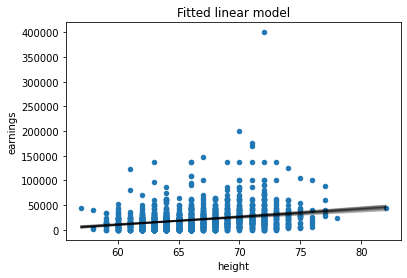

In [16]:
fig, ax = plt.subplots()

# Generate x range
height_domain = np.linspace(earnings["height"].min(), earnings["height"].max(), 100)

# Take 10 sample from posterior
num_samples = 10
chain_sample = fit_0.posterior.chain.to_series().sample(num_samples, replace=True)
draw_sample = fit_0.posterior.draw.to_series().sample(num_samples, replace=True)

for chain, draw in zip(chain_sample, draw_sample):
    a_hat = fit_0.posterior[{"draw":draw, "chain":chain}]["Intercept"].values
    b_hat = fit_0.posterior[{"draw":draw, "chain":chain}]["height"].values
    
    
    #breakpoint()
    # Plot Line
    ax.plot(height_domain, a_hat+b_hat*height_domain, c="black", alpha=.3)

# Add median line later
    
# Add scatter plot
earnings.plot(kind="scatter", x="height", y="earn", ax=ax)
ax.set_xlabel("height")
ax.set_ylabel("earnings")
ax.set_title("Fitted linear model");

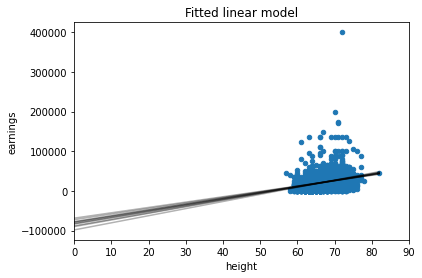

In [19]:
fig, ax = plt.subplots()

# Generate x range
height_domain = np.linspace(0, earnings["height"].max(), 100)

# Take 10 sample from posterior
num_samples = 10
chain_sample = fit_0.posterior.chain.to_series().sample(num_samples, replace=True)
draw_sample = fit_0.posterior.draw.to_series().sample(num_samples, replace=True)

for chain, draw in zip(chain_sample, draw_sample):
    a_hat = fit_0.posterior[{"draw":draw, "chain":chain}]["Intercept"].values
    b_hat = fit_0.posterior[{"draw":draw, "chain":chain}]["height"].values
    
    
    #breakpoint()
    # Plot Line
    ax.plot(height_domain, a_hat+b_hat*height_domain, c="black", alpha=.3)

# Add median line later
    
# Add scatter plot
earnings.plot(kind="scatter", x="height", y="earn", ax=ax)
ax.set_xlabel("height")
ax.set_ylabel("earnings")
ax.set_title("Fitted linear model")
ax.set_xlim(0, 90);

### Plot linear model draws with x-axis extended to 0

In [ ]:
# TODO

### Predict earnings in thousands dollars

In [13]:
earnings["earnk"] = earnings["earn"]/1000
model = Model(earnings)
results = model.fit('earnk ~ height + male', samples=1000, chains=4)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [earnk_sd, male, height, Intercept]
INFO:pymc3:NUTS: [earnk_sd, male, height, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 25 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 25 seconds.
/opt/conda/lib/python3.8/site-packages/arviz/data/io_pymc3.py:85: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


In [14]:
coefs = az.summary(results, stat_funcs=func_dict, extend=False, round_to=2)
coefs

,Median,MAD_SD
Intercept[0],-26.14,8.01
height[0],0.65,0.12
male[0],10.61,0.98
earnk_sd,21.41,0.24


for plotting scale back to dollar scale

In [15]:
coefs*1000

,Median,MAD_SD
Intercept[0],-26140.0,8010.0
height[0],650.0,120.0
male[0],10610.0,980.0
earnk_sd,21410.0,240.0


### Plot linear model, ggplot version

In [ ]:
# TODO

### Plot extrapolation, ggplot version

In [ ]:
# TODO

### The rest of the chapter

In [ ]:
# TODO

In [ ]:
# TODO: Add earnings code from page 119